In [1]:
"""Run Decoding within the 16 static conditions across time using cross-validation & LDA. Also identify the peak decoding times across subjects"""
import os
import mne 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
from collections import Counter
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.signal import find_peaks


#Sets bids directory and output directory for plots
bids_dir = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/'
data_path = f'{bids_dir}/derivatives/preprocessed/'
output_dir = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/LDA-16way Static'
os.makedirs(output_dir, exist_ok=True)

Processing S01...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S01_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1104 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 402, time = 135.0 ms
Second peak: sample 616, time = 313.3 ms


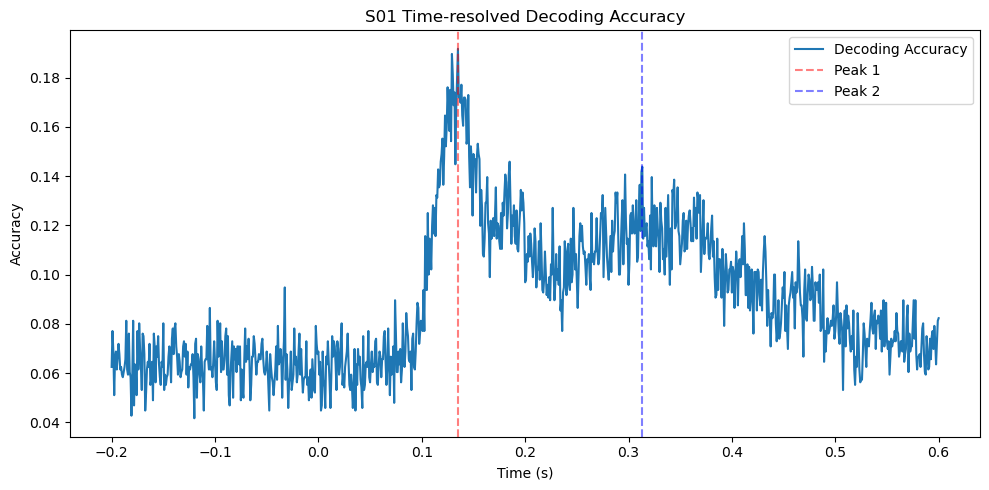

Processing S02...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S02_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1104 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 384, time = 120.0 ms
Second peak: sample 710, time = 391.7 ms


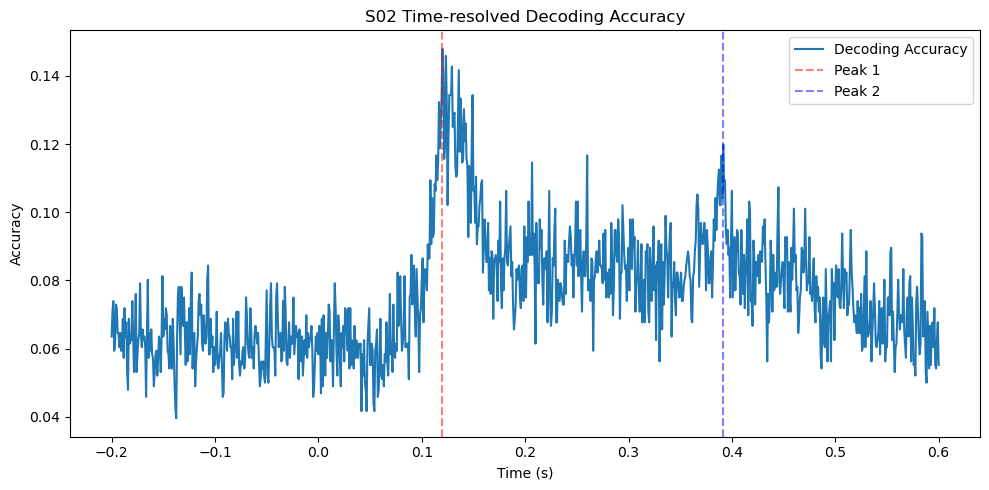

Processing S03...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S03_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 433, time = 160.8 ms
Second peak: sample 692, time = 376.7 ms


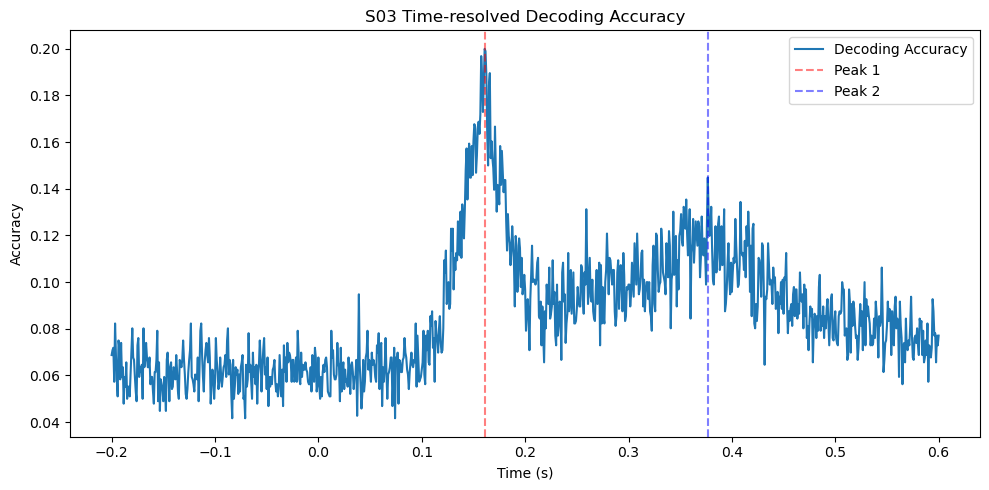

Processing S04...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S04_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 381, time = 117.5 ms
Second peak: sample 751, time = 425.8 ms


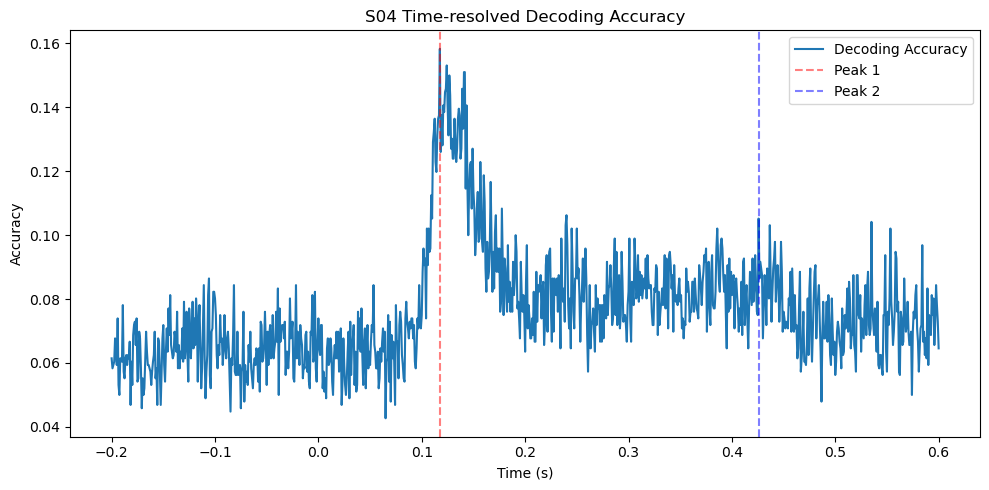

Processing S05...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S05_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 419, time = 149.2 ms
Second peak: sample 609, time = 307.5 ms


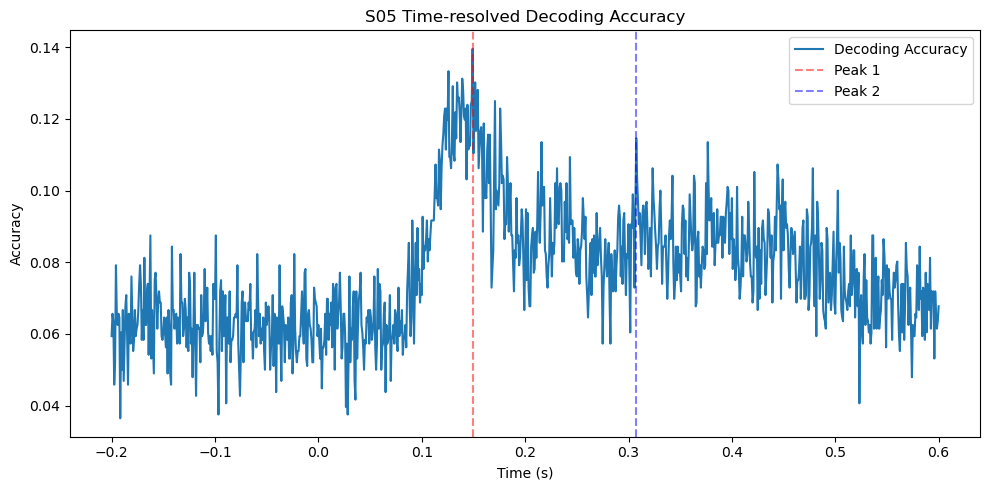

Processing S06...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S06_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 395, time = 129.2 ms
Second peak: sample 821, time = 484.2 ms


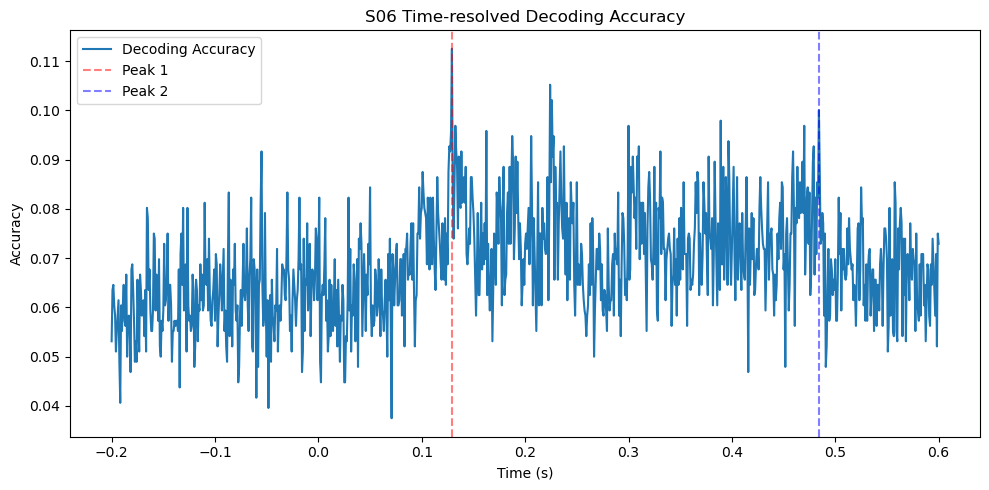

Processing S07...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S07_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 389, time = 124.2 ms
Second peak: sample 775, time = 445.8 ms


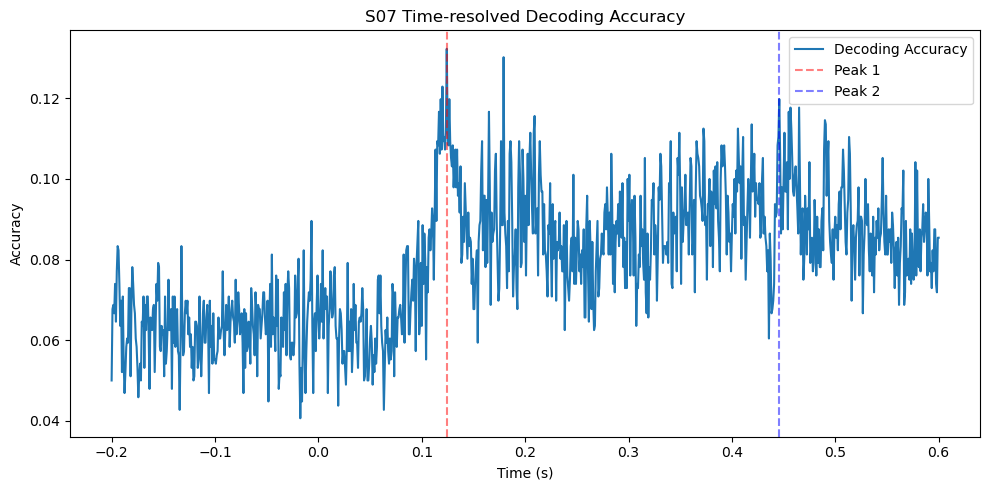

Processing S08...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S08_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 387, time = 122.5 ms
Second peak: sample 652, time = 343.3 ms


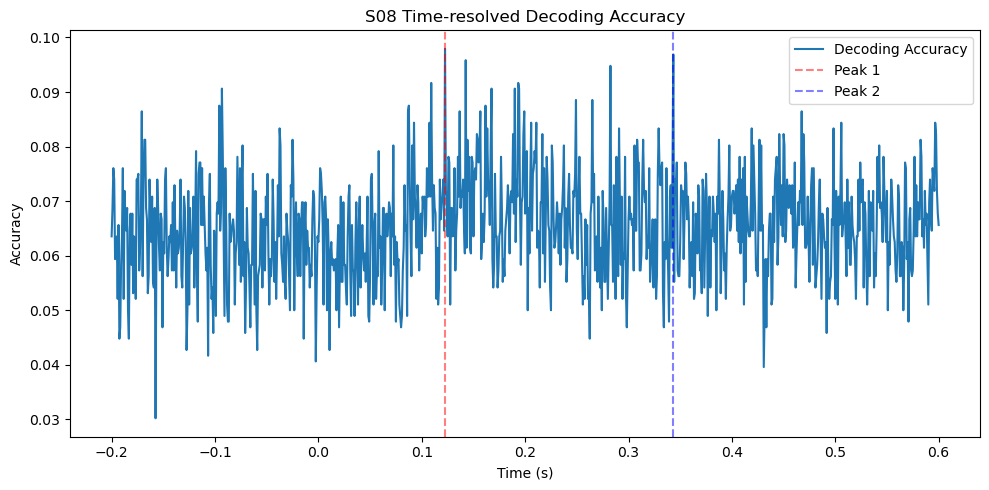

Processing S09...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S09_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 390, time = 125.0 ms
Second peak: sample 689, time = 374.2 ms


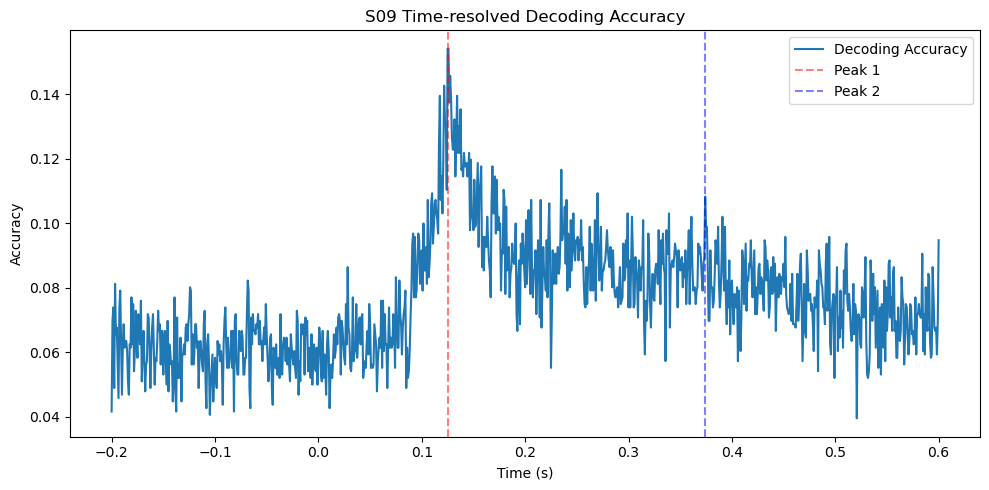

Processing S10...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S10_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 401, time = 134.2 ms
Second peak: sample 704, time = 386.7 ms


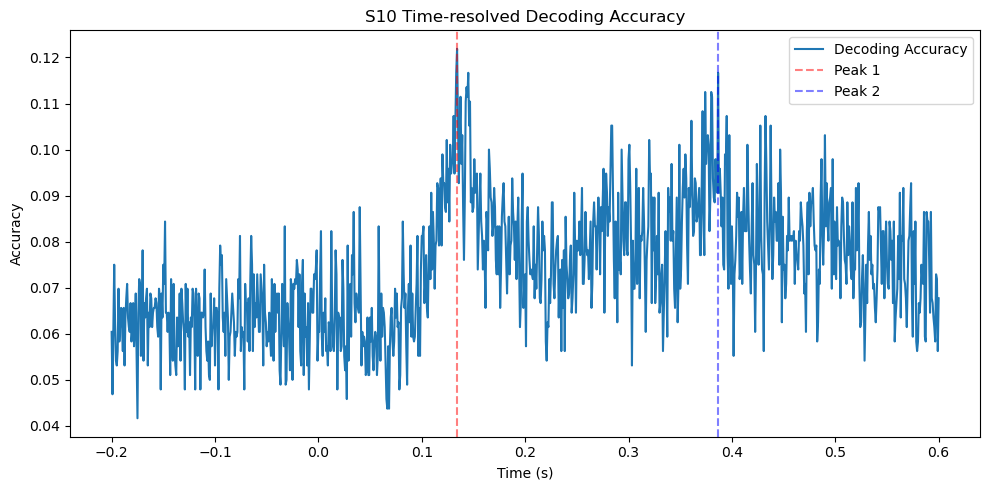

Processing S11...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S11_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 383, time = 119.2 ms
Second peak: sample 780, time = 450.0 ms


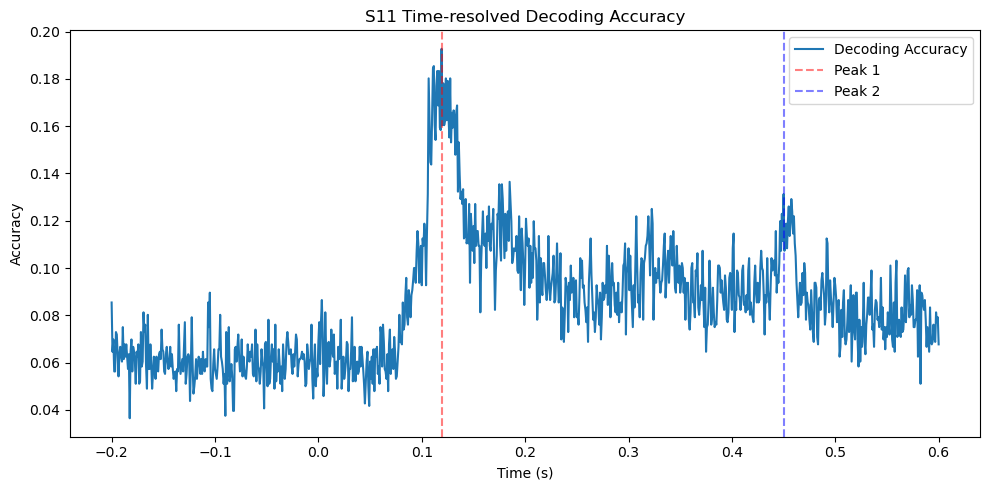

Processing S12...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S12_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 377, time = 114.2 ms
Second peak: sample 695, time = 379.2 ms


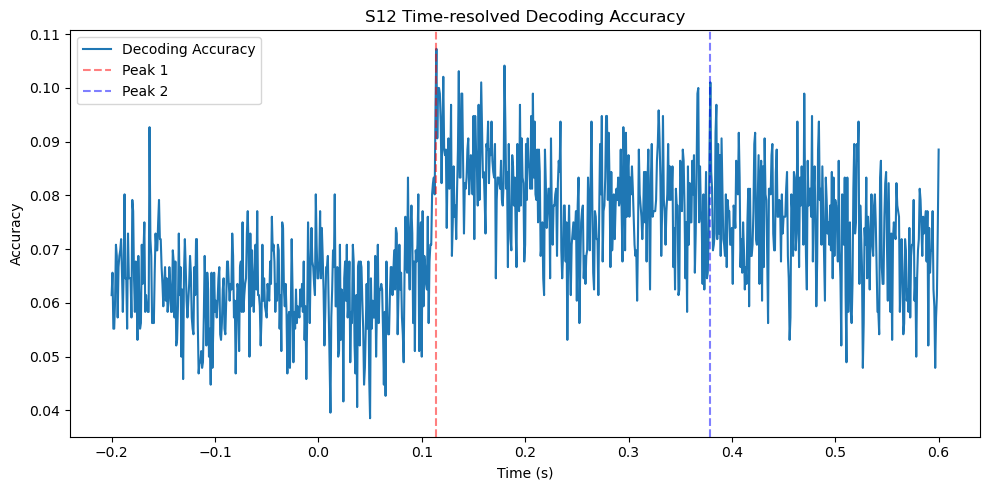

Processing S13...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S13_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1056 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 426, time = 155.0 ms
Second peak: sample 635, time = 329.2 ms


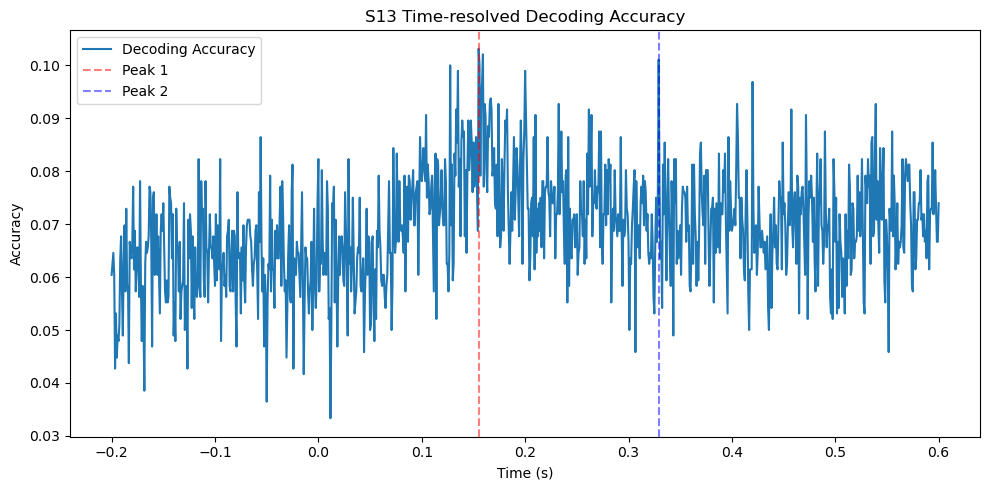

Processing S14...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S14_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1054 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 445, time = 170.8 ms
Second peak: sample 644, time = 336.7 ms


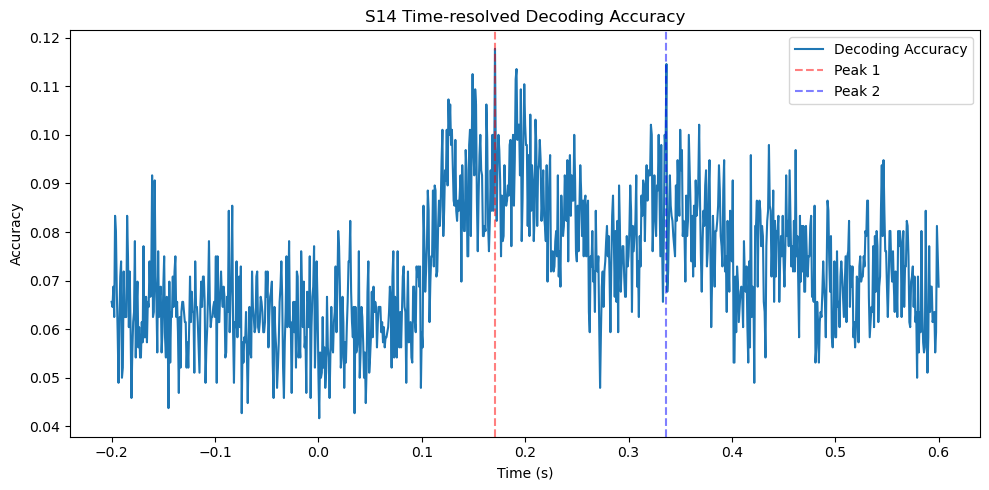

Processing S15...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S15_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1051 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 382, time = 118.3 ms
Second peak: sample 732, time = 410.0 ms


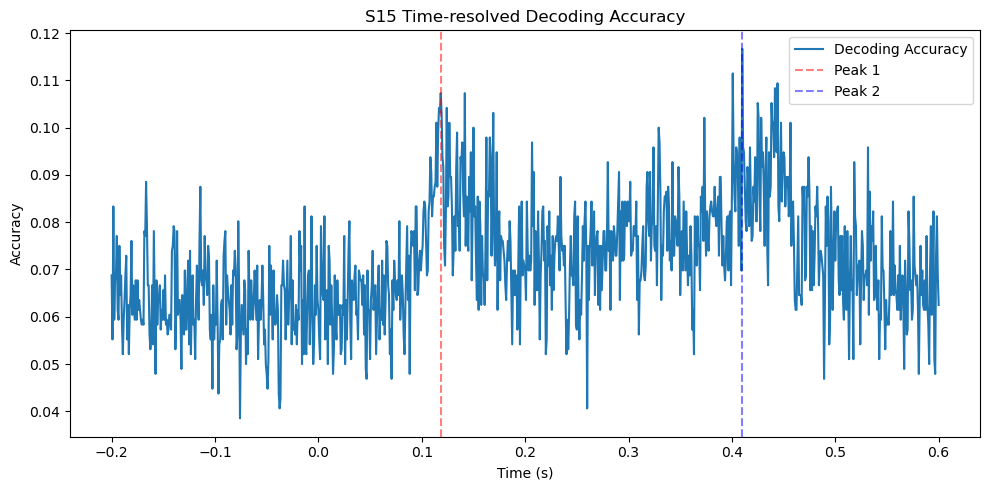

Processing S16...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S16_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1052 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 376, time = 113.3 ms
Second peak: sample 772, time = 443.3 ms


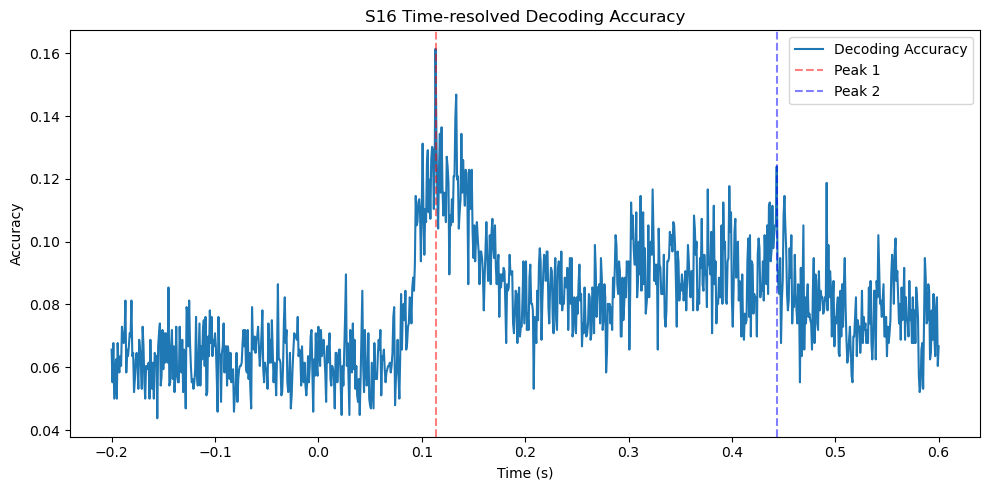

Processing S17...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S17_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1054 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 385, time = 120.8 ms
Second peak: sample 689, time = 374.2 ms


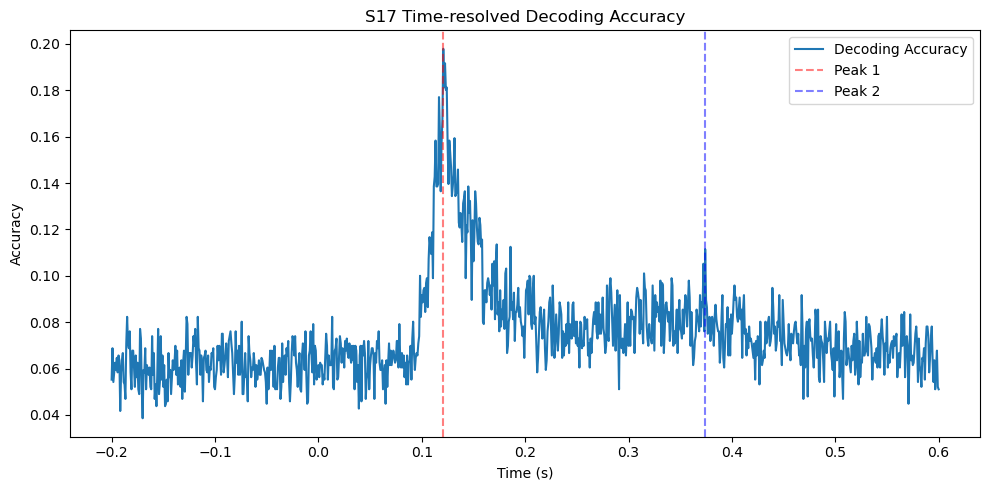

Processing S18...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S18_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1054 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 471, time = 192.5 ms
Second peak: sample 619, time = 315.8 ms


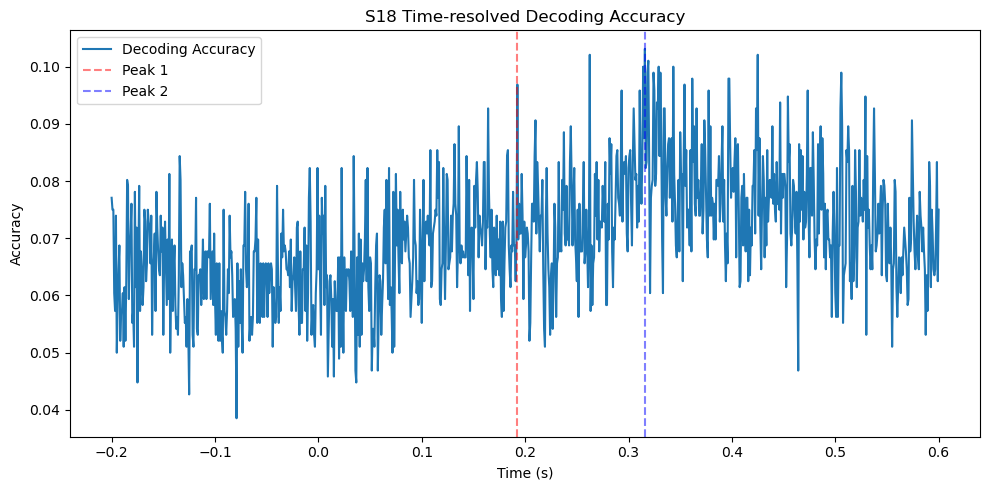

Processing S19...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S19_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1054 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 477, time = 197.5 ms
Second peak: sample 728, time = 406.7 ms


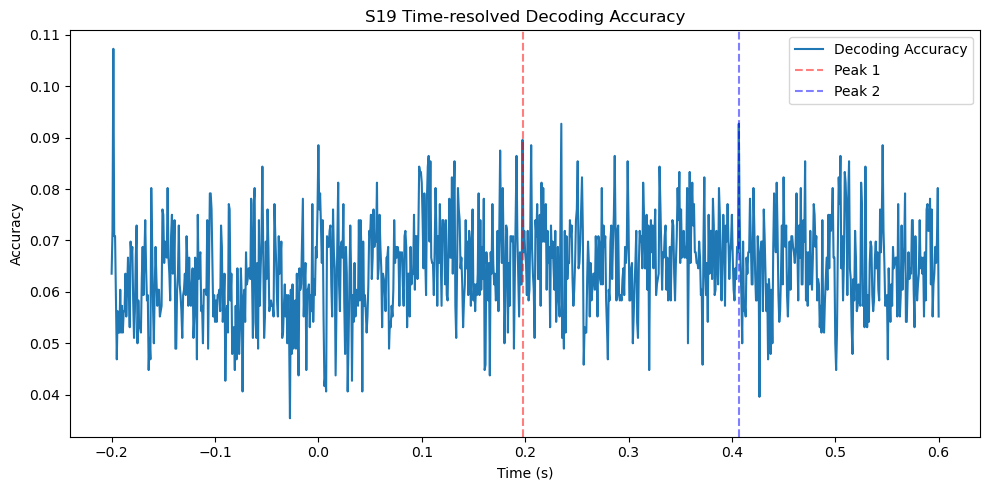

Processing S20...
Reading /System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/Data/Bids/derivatives/preprocessed/sub-S20_Still_preprocessed-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
1055 matching events found
No baseline correction applied
0 projection items activated
(720,)
(720,)
(720,)
(720,)
First peak: sample 379, time = 115.8 ms
Second peak: sample 689, time = 374.2 ms


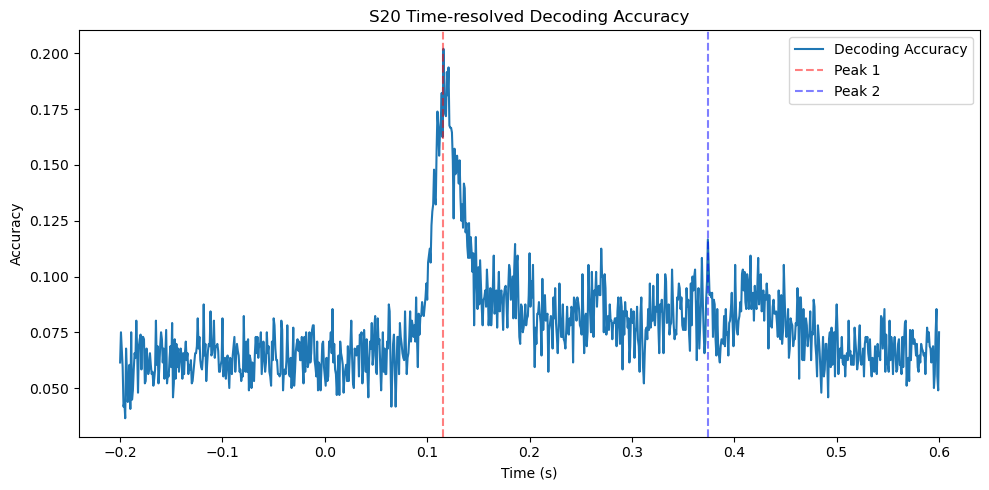

In [ ]:
def train_test_split(epochs,test_chunk,target_id,cv_id='run_nr'):
    # break data into training and testing set for cross-validation
    epochs_test = epochs[epochs.metadata[cv_id]==test_chunk]
    epochs_train = epochs[epochs.metadata[cv_id]!=test_chunk]
    X_test = epochs_test._data
    X_train = epochs_train._data

    # testing & training labels
    y_train = epochs_train.metadata[target_id].to_numpy()
    print(np.shape(y_train))
    y_test = epochs_test.metadata[target_id].to_numpy()

    return X_train, X_test, y_train, y_test


def run_decoding(x_train,y_train,x_test,y_test):
    #Run LDA
    pipe = Pipeline([('scaler', StandardScaler()), 
            ('classifier', LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.01))])
    pipe.fit(x_train,y_train)
    predictions = pipe.predict(x_test)
    accuracy = predictions == y_test

    return np.mean(accuracy)


#Loop to load in subjects, remove catch trials, format metadata, run classifier, and save data/plots
subjects = [f"S{i:02}" for i in range(1, 21)]
subject_peak_data = {}

for Subject in subjects:
    print(f"Processing {Subject}...")
    fn_still = f'sub-{Subject}_Still_preprocessed-epo.fif'
    epochs_still = mne.read_epochs(data_path + fn_still)

    epochs_still.metadata['degrees_string'] = [k.split('/')[-1] for k in epochs_still.metadata['trial_type']]
    epochs_still = epochs_still[epochs_still.metadata['degrees_string'] != 'catch']
    epochs_still.metadata['degrees'] = [int(i) for i in epochs_still.metadata['degrees_string']]

    accuracy = []
    for test_run in np.unique(epochs_still.metadata.run_nr):
        x_train, x_test, y_train, y_test = train_test_split(epochs_still, test_run, 'degrees_string')
        accuracy.append(Parallel(n_jobs=12, prefer="threads")(
            delayed(run_decoding)(x_train[:, :, t], y_train, x_test[:, :, t], y_test)
            for t in range(len(epochs_still.times))
        ))
    mean_accuracy = np.mean(np.array(accuracy), axis=0)
    np.save(f"{output_dir}/data/{Subject}_DecodingAccuracyTimecourse.npy", mean_accuracy)
    times = epochs_still.times
    peaks, _ = find_peaks(mean_accuracy, distance=10)

    peak_1_range = (times >= 0.1) & (times <= 0.2)
    peak_2_range = times >= 0.3
    peak_1_idx = peaks[peak_1_range[peaks]]
    peak_2_idx = peaks[peak_2_range[peaks]]

    best_peak_1, best_peak_2 = None, None
    if len(peak_1_idx) > 0:
        best_peak_1 = peak_1_idx[np.argmax(mean_accuracy[peak_1_idx])]
    else:
        print("No peak found in 100–200 ms")

    if len(peak_2_idx) > 0:
        best_peak_2 = peak_2_idx[np.argmax(mean_accuracy[peak_2_idx])]
    else:
        print("No peak found after 300 ms")

    if best_peak_1 is not None:
        print(f"First peak: sample {best_peak_1}, time = {times[best_peak_1]*1000:.1f} ms")
    if best_peak_2 is not None:
        print(f"Second peak: sample {best_peak_2}, time = {times[best_peak_2]*1000:.1f} ms")

    # Store peak info for subject
    subject_peak_data[Subject] = {
        'peak1_sample': best_peak_1 if best_peak_1 is not None else None,
        'peak1_time_ms': times[best_peak_1] * 1000 if best_peak_1 is not None else None,
        'peak2_sample': best_peak_2 if best_peak_2 is not None else None,
        'peak2_time_ms': times[best_peak_2] * 1000 if best_peak_2 is not None else None,
    }

    # Convert sample indices to times for plotting vertical lines
    def sample_to_time(sample_idx):
        sfreq = 1200
        return (sample_idx - 240) / sfreq  # converts sample back to time axis

    plt.figure(figsize=(10, 5))
    plt.plot(times, mean_accuracy, label="Decoding Accuracy")

    if best_peak_1 is not None:
        plt.axvline(sample_to_time(best_peak_1), color='red', linestyle='--', label='Peak 1', alpha=0.5)
    if best_peak_2 is not None:
        plt.axvline(sample_to_time(best_peak_2), color='blue', linestyle='--', label='Peak 2', alpha=0.5)

    plt.xlabel('Time (s)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{Subject} Time-resolved Decoding Accuracy')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/plots/{Subject}_DecodingDiscrete.png")
    plt.show()
    plt.close()

# Save all peaks to a CSV
df = pd.DataFrame.from_dict(subject_peak_data, orient='index')
df.index.name = 'Subject'
df.to_csv(f"{output_dir}/Peak_Times.csv")